# Scaling effects std deviation

Since the std deviation is a square root, it is larger when the values are small, and smaller when the values are large. Thus scaling to a constant range for all values makes sense, to have consistent scale of the std deviation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gaussian_process.GPfunctions as gp
from gaussian_process import GaussianProcess
from gaussian_process.kernels import Matern2_5Kernel
from gaussian_process import GPPrediction

In [2]:
X = np.linspace(start=0.0, stop=1.0, num=1_000)

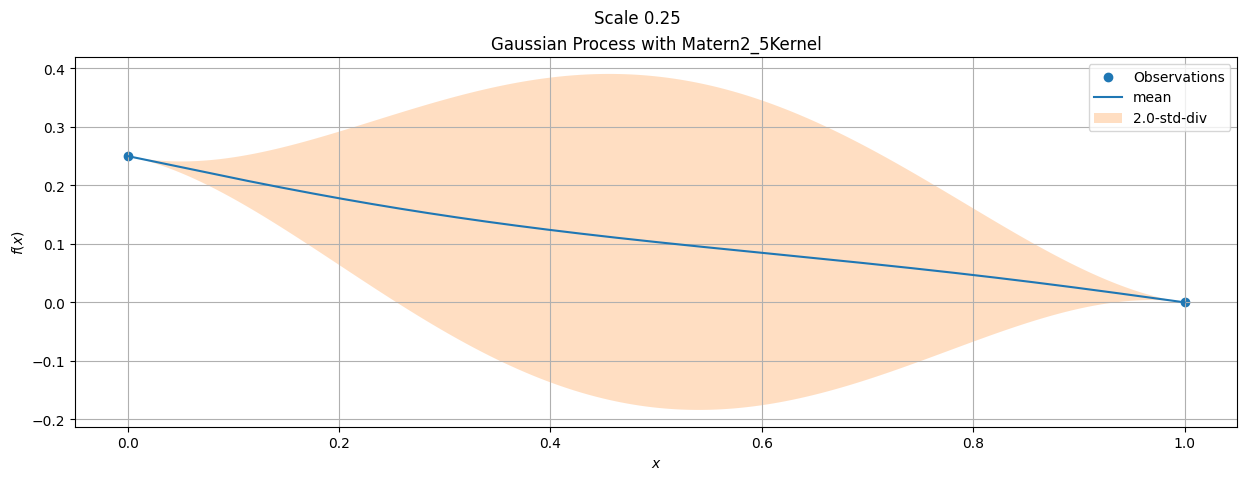

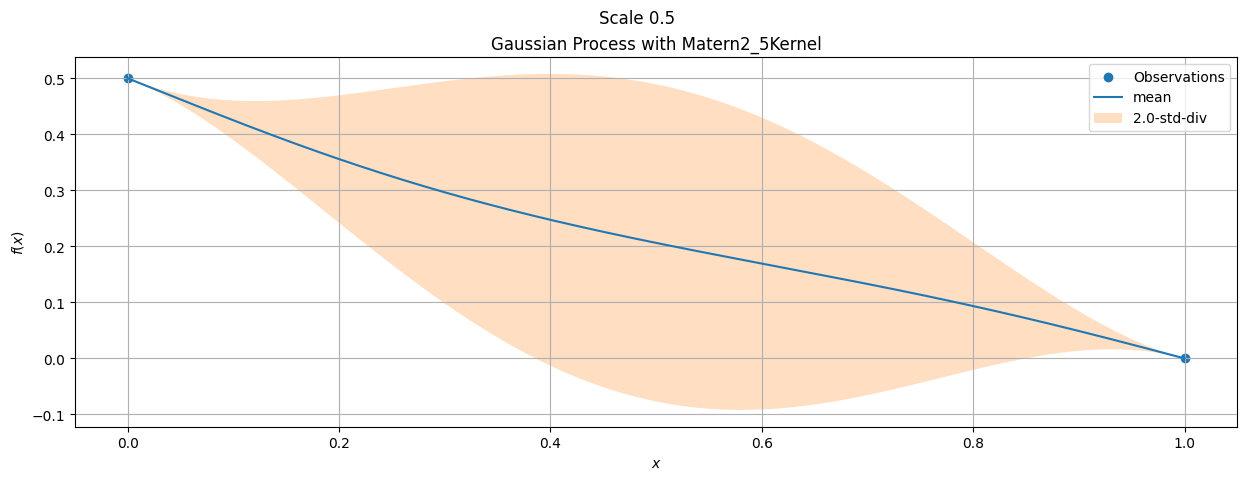

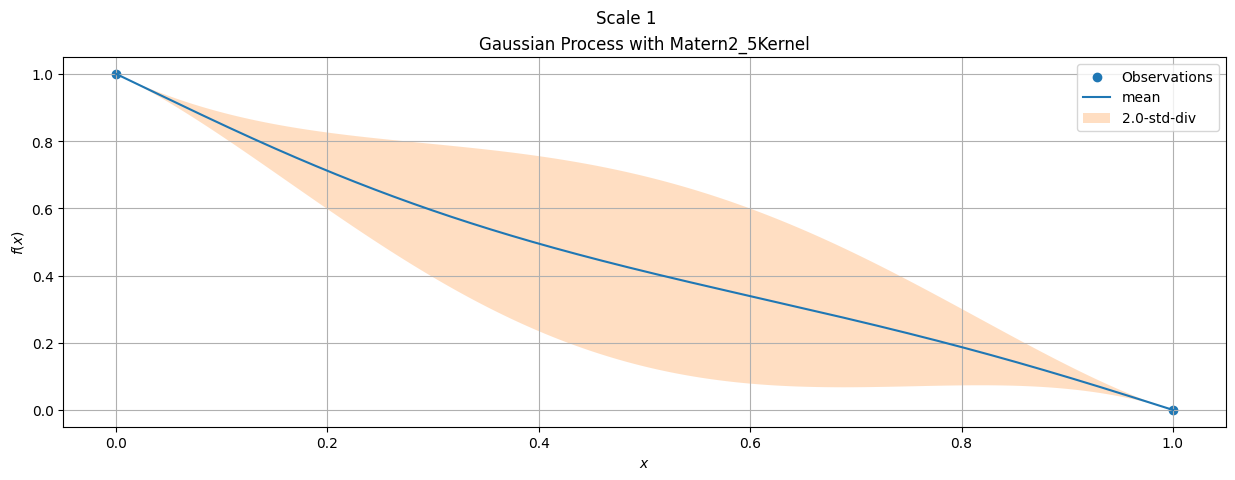

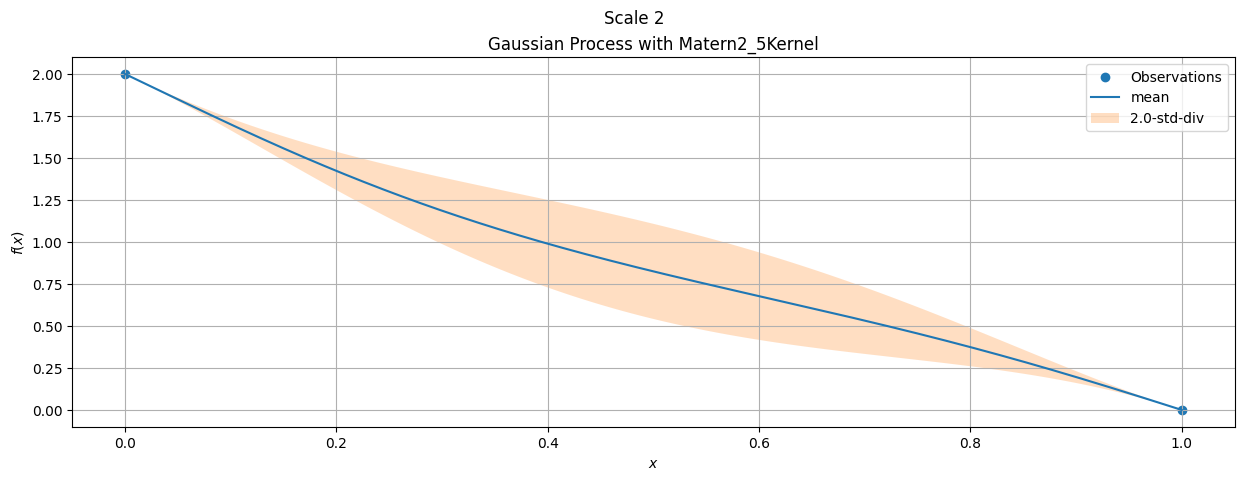

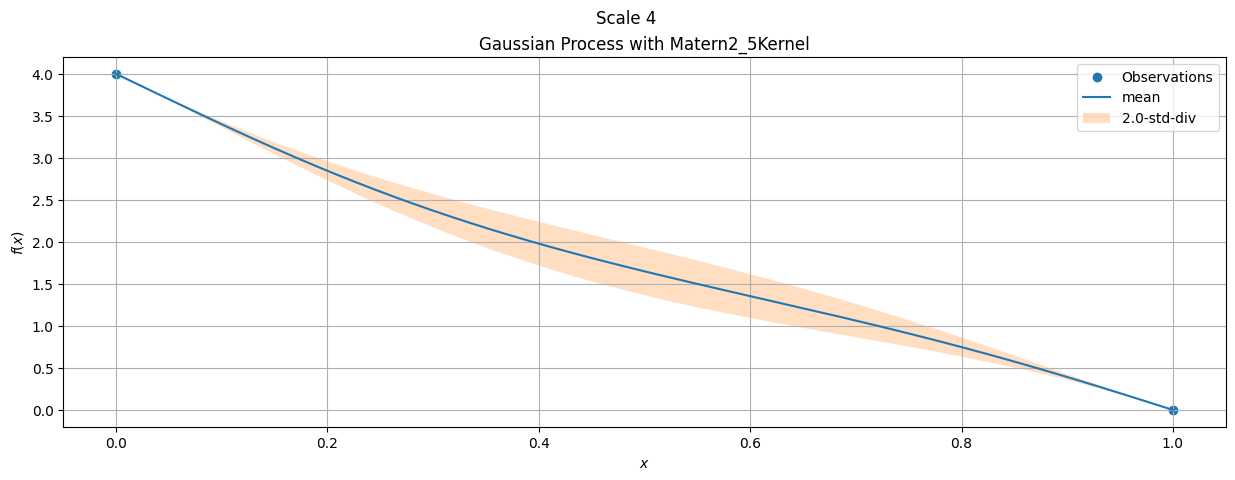

In [3]:
# Solve by varying hyperparameters
kernel = Matern2_5Kernel(l=1)

X_train = np.array([0.0, 1.0])
f_train = np.array([1.0, 0.0])
g_train = np.array([-1.5, -1])
f_noise = 1e-14
g_noise = 1e-14

scales = [1 / 4, 1 / 2, 1, 2, 4]

for scale in scales:
    GP_posterior = GaussianProcess(
        kernel,
        x_known=X_train,
        f_known=f_train * scale,
        g_known=g_train * scale,
        f_noise=f_noise,
        g_noise=g_noise,
    )

    pred = GPPrediction(X, GP_posterior)

    fig, (ax1) = plt.subplots(1, 1, sharey=True)

    ax1.scatter(X_train, f_train * scale, label="Observations")
    gp.plot_gp(ax1, X, pred.mean, pred.std_deviation)
    gp.plot_label(ax1, f"Gaussian Process with {kernel.__class__.__name__}")

    fig.suptitle(f"Scale {scale}")
    fig.set_figwidth(15)
    plt.show()